# Forcing via the baroclinic surface pressure gradient
We can use the potential tides implememntation to force the TPXO SSH amplitude solution.
## At every horizontal grid cell

In [337]:
import xarray as xr
import matplotlib.pyplot as plt
import os
import sys
import numpy as np
from dotenv import load_dotenv, find_dotenv
import scipy.io as sio

# find .env automagically by walking up directories until it's found
dotenv_path = find_dotenv()

# load up the entries as environment variables
load_dotenv(dotenv_path)

src_dir = os.environ.get('srcdir')
print(src_dir)

sys.path.append(src_dir)

# always reload modules marked with "%aimport"
%load_ext autoreload
%autoreload 1

%aimport features.compare_tide
%aimport features.grid_ttide
from features.grid_ttide import grid_ttide, plot_M2O1_diff
from features.compare_tide import compare_tide

/home/ubuntu/bigStick/tidal_melting/src
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [340]:
file_path = os.path.join(os.environ.get('rawdir'),'waom10_full_forcing','ocean_his_hourly.nc')
ds_ref = xr.open_mfdataset(file_path,chunks={'eta_rho':100,'xi_rho':100})
grid_lr_path =  os.path.join(os.environ.get('rawdir'),'waom10_full_forcing','Data','waom10','waom10_grd_large.nc')
grid_lr = xr.open_mfdataset(grid_lr_path)

In [39]:
tpxo_path = os.path.join(os.environ.get('rawdir'),'waom10_full_forcing','Data','waom10','waom10_tds_large.nc')
dsf = xr.open_mfdataset(tpxo_path)

/home/ubuntu/bigStick/anaconda3/envs/tidal_melting/lib/python3.6/site-packages/dask/local.py:271: RuntimeWarning: invalid value encountered in true_divide
  return func(*args2)
/home/ubuntu/bigStick/anaconda3/envs/tidal_melting/lib/python3.6/site-packages/dask/local.py:271: RuntimeWarning: divide by zero encountered in true_divide
  return func(*args2)


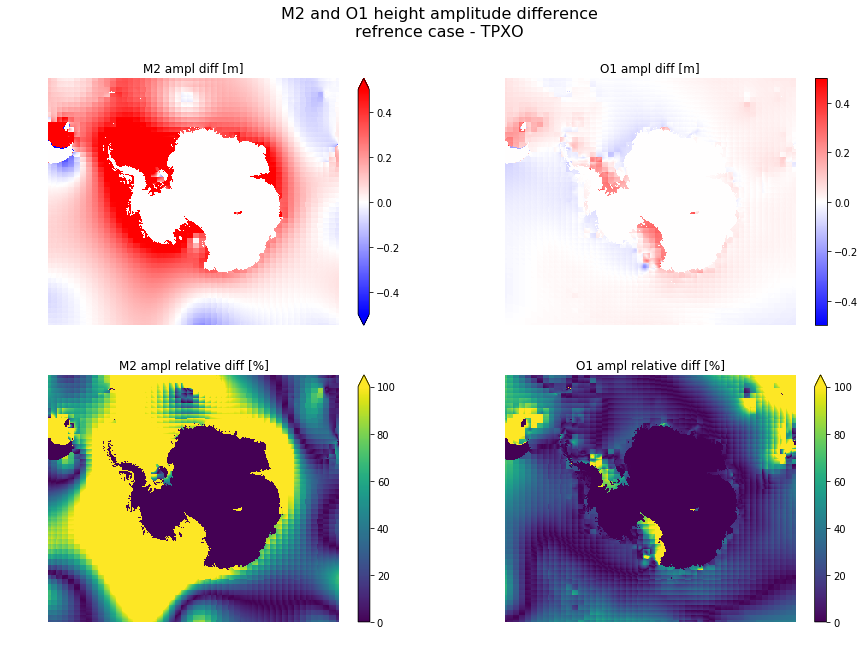

In [338]:
ds_ref = grid_ttide(ds_ref.zeta,grid_lr,res=50)
plot_M2O1_diff(ds_ref,'refrence case',dsf,'TPXO',vmin=-0.50,vmax=0.50)

In [328]:
stations,RMSE = compare_tide(atg_path,ds_ref.zeta,mask,stime=stime,constit_list=constit_list,station_list=station_list)

stime =  2007-01-02 00:00:00  constits =  ['M2', 'O1'] stations =  [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108]


VBox(children=(HTML(value=''), IntProgress(value=0, max=108)))

Station ID || Amp(amp_err)[m]:  atg   roms || phase(phase_err)[deg]:  atg   roms || Station Name; RecLen [days]; Nearest Neibour [km]
M2
1 || 0.19  0.12(0.01)  || 287.87  230.30(7.46)  ||  faraday   365.0  0.85
2 || 0.34  0.16(0.02)  || 197.87  59.19(8.47)  ||  forster   307.25  0.83
3 || 0.12  0.11(0.01)  || 265.51  237.72(7.38)  ||  Rothera   365.0  1.29
4 || 0.45  0.04(0.01)  || 264.06  146.04(10.51)  ||  Signy   385.0  0.58
5 || 0.49  0.09(0.01)  || 280.00  163.96(7.98)  ||  PTC_4_2_01   4.2  0.18
6 || 0.53  0.13(0.02)  || 233.00  103.36(9.25)  ||  PTC_4_2_02   30.0  1.08
7 || 0.57  0.14(0.02)  || 242.00  102.73(8.49)  ||  PTC_4_2_03   180.0  0.48
8 || 0.41  0.17(0.02)  || 189.00  50.31(7.88)  ||  PTC_4_2_05 Georg Von Neumayer   324.0  0.37
9 || 0.46  0.16(0.03)  || 201.00  60.12(9.08)  ||  PTC_4_2_06 Kapp Norvegia   367.0  0.71
10 || 0.56  0.17(0.02)  || 220.00  76.03(8.91)  ||  PTC_4_2_07 Vestkapp   316.0  0.56
11 || 0.40  0.08(0.01)  || 274.00  215.35(8.76)  ||  PTC_4_2_12 Signy

62 || 0.15  0.06(0.01)  || 68.00  216.22(10.09)  ||  Moutonnee Lake (Looks Bad)   15.0  0.99
63 || 0.26  0.06(0.01)  || 73.00  216.30(10.28)  ||  Ablation Lake   54.0  1.30
64 || 0.27  0.06(0.01)  || 81.00  214.67(9.89)  ||  Hobbs Pool   15.0  1.06
65 || 0.40  0.12(0.02)  || 184.50  310.48(8.69)  ||  AnSlope (NW Ross Sea Shelf Break)   325.0  0.42
66 || 0.31  0.09(0.02)  || 2.80  134.09(10.26)  ||  Halley   365.0  0.96
67 || 0.29  0.10(0.02)  || 272.80  35.05(9.60)  ||  Amery Ice Shelf TS01   48.0  0.91
68 || 0.30  0.10(0.02)  || 274.30  38.73(10.66)  ||  Amery Ice Shelf TS03   57.0  0.65
69 || 0.31  0.10(0.02)  || 272.00  34.77(9.36)  ||  Amery Ice Shelf TS04   65.0  1.03
70 || 0.09  0.10(0.02)  || 286.60  39.72(10.98)  ||  Amery Ice Shelf TS05 (partially grounded)   67.0  1.29
71 || 0.35  0.09(0.02)  || 182.40  284.81(12.37)  ||  Ross Ice Shelf AFLT   68.0  0.31
72 || 0.36  0.08(0.01)  || 171.20  276.16(10.33)  ||  Ross Ice Shelf BFLT   74.0  1.11
73 || 0.38  0.07(0.02)  || 138.10  2

## Tuning: No forcing under the ice shelves
Dave suggested that the to high tides might come from some model amplification under the ice shelves. Therefore I look at an experiment, without tidal surface forcing where ice shelf is present.
### Generating the tidal mask

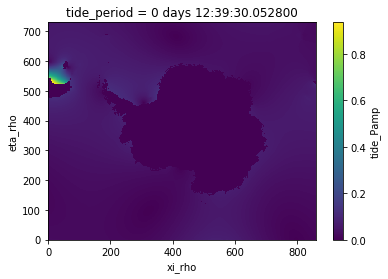

In [341]:
#mask tidal forcing
pott_path = os.path.join(os.environ.get('rawdir'),'waom10_full_forcing','Data','waom10','waom10_ptds_large.nc')
pott_ds = xr.open_dataset(pott_path)
grid_path =  os.path.join(os.environ.get('rawdir'),'waom10_full_forcing','Data','waom10','waom10_grd_large.nc')
grid_ds = xr.open_dataset(grid_path)
Pamp_masked = pott_ds.tide_Pamp.where(grid_lr.zice.values == 0.0 ,0.0)
plt.close()
Pamp_masked[2].plot()
plt.show()

### Results

In [ ]:
#look at results
file_path = os.path.join(os.environ.get('rawdir'),'waom10_tidal_mask','ocean_his_tm_0006.nc')
ds_tm = xr.open_mfdataset(file_path)
ds_tm = grid_ttide(ds_tm.zeta,grid_lr,res=50)
plot_M2O1_diff(ds_tm,'ice shelf mask',dsf,'TPXO',vmin=-0.50,vmax=0.50)

setting up the new fields  ['amp', 'amp_err', 'phase', 'phase_err']  for  ['O1', 'M2']
applying t_tide to every  50 th cell ...


VBox(children=(HTML(value=''), IntProgress(value=0, max=50)))

In [328]:
stations,RMSE = compare_tide(atg_path,ds_tm.zeta,mask,stime=stime,constit_list=constit_list,station_list=station_list)

stime =  2007-01-02 00:00:00  constits =  ['M2', 'O1'] stations =  [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108]


VBox(children=(HTML(value=''), IntProgress(value=0, max=108)))

Station ID || Amp(amp_err)[m]:  atg   roms || phase(phase_err)[deg]:  atg   roms || Station Name; RecLen [days]; Nearest Neibour [km]
M2
1 || 0.19  0.12(0.01)  || 287.87  230.30(7.46)  ||  faraday   365.0  0.85
2 || 0.34  0.16(0.02)  || 197.87  59.19(8.47)  ||  forster   307.25  0.83
3 || 0.12  0.11(0.01)  || 265.51  237.72(7.38)  ||  Rothera   365.0  1.29
4 || 0.45  0.04(0.01)  || 264.06  146.04(10.51)  ||  Signy   385.0  0.58
5 || 0.49  0.09(0.01)  || 280.00  163.96(7.98)  ||  PTC_4_2_01   4.2  0.18
6 || 0.53  0.13(0.02)  || 233.00  103.36(9.25)  ||  PTC_4_2_02   30.0  1.08
7 || 0.57  0.14(0.02)  || 242.00  102.73(8.49)  ||  PTC_4_2_03   180.0  0.48
8 || 0.41  0.17(0.02)  || 189.00  50.31(7.88)  ||  PTC_4_2_05 Georg Von Neumayer   324.0  0.37
9 || 0.46  0.16(0.03)  || 201.00  60.12(9.08)  ||  PTC_4_2_06 Kapp Norvegia   367.0  0.71
10 || 0.56  0.17(0.02)  || 220.00  76.03(8.91)  ||  PTC_4_2_07 Vestkapp   316.0  0.56
11 || 0.40  0.08(0.01)  || 274.00  215.35(8.76)  ||  PTC_4_2_12 Signy

62 || 0.15  0.06(0.01)  || 68.00  216.22(10.09)  ||  Moutonnee Lake (Looks Bad)   15.0  0.99
63 || 0.26  0.06(0.01)  || 73.00  216.30(10.28)  ||  Ablation Lake   54.0  1.30
64 || 0.27  0.06(0.01)  || 81.00  214.67(9.89)  ||  Hobbs Pool   15.0  1.06
65 || 0.40  0.12(0.02)  || 184.50  310.48(8.69)  ||  AnSlope (NW Ross Sea Shelf Break)   325.0  0.42
66 || 0.31  0.09(0.02)  || 2.80  134.09(10.26)  ||  Halley   365.0  0.96
67 || 0.29  0.10(0.02)  || 272.80  35.05(9.60)  ||  Amery Ice Shelf TS01   48.0  0.91
68 || 0.30  0.10(0.02)  || 274.30  38.73(10.66)  ||  Amery Ice Shelf TS03   57.0  0.65
69 || 0.31  0.10(0.02)  || 272.00  34.77(9.36)  ||  Amery Ice Shelf TS04   65.0  1.03
70 || 0.09  0.10(0.02)  || 286.60  39.72(10.98)  ||  Amery Ice Shelf TS05 (partially grounded)   67.0  1.29
71 || 0.35  0.09(0.02)  || 182.40  284.81(12.37)  ||  Ross Ice Shelf AFLT   68.0  0.31
72 || 0.36  0.08(0.01)  || 171.20  276.16(10.33)  ||  Ross Ice Shelf BFLT   74.0  1.11
73 || 0.38  0.07(0.02)  || 138.10  2

## 5x Drag coefficient
Ramping up the drag coefficent from 0.003 to 0.015 to represent conversion to internal tides, which is not present in 10 km model run.

In [ ]:
#look at results
file_path = os.path.join(os.environ.get('rawdir'),'waom10_tidal_mask','ocean_his_5xCd_0006.nc')
ds_Cd = xr.open_mfdataset(file_path)
ds_Cd = grid_ttide(ds_Cd.zeta,grid_lr,res=50)
plot_M2O1_diff(ds_Cd,'5x Cd',dsf,'TPXO',vmin=-0.50,vmax=0.50)

setting up the new fields  ['amp', 'amp_err', 'phase', 'phase_err']  for  ['O1', 'M2']
applying t_tide to every  50 th cell ...


VBox(children=(HTML(value=''), IntProgress(value=0, max=50)))

In [328]:
stations,RMSE = compare_tide(atg_path,ds_Cd.zeta,mask,stime=stime,constit_list=constit_list,station_list=station_list)

stime =  2007-01-02 00:00:00  constits =  ['M2', 'O1'] stations =  [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108]


VBox(children=(HTML(value=''), IntProgress(value=0, max=108)))

Station ID || Amp(amp_err)[m]:  atg   roms || phase(phase_err)[deg]:  atg   roms || Station Name; RecLen [days]; Nearest Neibour [km]
M2
1 || 0.19  0.12(0.01)  || 287.87  230.30(7.46)  ||  faraday   365.0  0.85
2 || 0.34  0.16(0.02)  || 197.87  59.19(8.47)  ||  forster   307.25  0.83
3 || 0.12  0.11(0.01)  || 265.51  237.72(7.38)  ||  Rothera   365.0  1.29
4 || 0.45  0.04(0.01)  || 264.06  146.04(10.51)  ||  Signy   385.0  0.58
5 || 0.49  0.09(0.01)  || 280.00  163.96(7.98)  ||  PTC_4_2_01   4.2  0.18
6 || 0.53  0.13(0.02)  || 233.00  103.36(9.25)  ||  PTC_4_2_02   30.0  1.08
7 || 0.57  0.14(0.02)  || 242.00  102.73(8.49)  ||  PTC_4_2_03   180.0  0.48
8 || 0.41  0.17(0.02)  || 189.00  50.31(7.88)  ||  PTC_4_2_05 Georg Von Neumayer   324.0  0.37
9 || 0.46  0.16(0.03)  || 201.00  60.12(9.08)  ||  PTC_4_2_06 Kapp Norvegia   367.0  0.71
10 || 0.56  0.17(0.02)  || 220.00  76.03(8.91)  ||  PTC_4_2_07 Vestkapp   316.0  0.56
11 || 0.40  0.08(0.01)  || 274.00  215.35(8.76)  ||  PTC_4_2_12 Signy

62 || 0.15  0.06(0.01)  || 68.00  216.22(10.09)  ||  Moutonnee Lake (Looks Bad)   15.0  0.99
63 || 0.26  0.06(0.01)  || 73.00  216.30(10.28)  ||  Ablation Lake   54.0  1.30
64 || 0.27  0.06(0.01)  || 81.00  214.67(9.89)  ||  Hobbs Pool   15.0  1.06
65 || 0.40  0.12(0.02)  || 184.50  310.48(8.69)  ||  AnSlope (NW Ross Sea Shelf Break)   325.0  0.42
66 || 0.31  0.09(0.02)  || 2.80  134.09(10.26)  ||  Halley   365.0  0.96
67 || 0.29  0.10(0.02)  || 272.80  35.05(9.60)  ||  Amery Ice Shelf TS01   48.0  0.91
68 || 0.30  0.10(0.02)  || 274.30  38.73(10.66)  ||  Amery Ice Shelf TS03   57.0  0.65
69 || 0.31  0.10(0.02)  || 272.00  34.77(9.36)  ||  Amery Ice Shelf TS04   65.0  1.03
70 || 0.09  0.10(0.02)  || 286.60  39.72(10.98)  ||  Amery Ice Shelf TS05 (partially grounded)   67.0  1.29
71 || 0.35  0.09(0.02)  || 182.40  284.81(12.37)  ||  Ross Ice Shelf AFLT   68.0  0.31
72 || 0.36  0.08(0.01)  || 171.20  276.16(10.33)  ||  Ross Ice Shelf BFLT   74.0  1.11
73 || 0.38  0.07(0.02)  || 138.10  2

## 2x viscosity
Ramping up the visc2 from 500 m^2/s to 1000 m^2/s.

In [ ]:
#look at results
file_path = os.path.join(os.environ.get('rawdir'),'waom10_tidal_mask','ocean_his_2xVisc2_0006.nc')
ds_visc = xr.open_mfdataset(file_path)
ds_visc = grid_ttide(ds_visc.zeta,grid_lr,res=50)
plot_M2O1_diff(ds_visc,'2x visc2',dsf,'TPXO',vmin=-0.50,vmax=0.50)

setting up the new fields  ['amp', 'amp_err', 'phase', 'phase_err']  for  ['O1', 'M2']
applying t_tide to every  50 th cell ...


VBox(children=(HTML(value=''), IntProgress(value=0, max=50)))

In [328]:
stations,RMSE = compare_tide(atg_path,ds_visc.zeta,mask,stime=stime,constit_list=constit_list,station_list=station_list)

stime =  2007-01-02 00:00:00  constits =  ['M2', 'O1'] stations =  [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108]


VBox(children=(HTML(value=''), IntProgress(value=0, max=108)))

Station ID || Amp(amp_err)[m]:  atg   roms || phase(phase_err)[deg]:  atg   roms || Station Name; RecLen [days]; Nearest Neibour [km]
M2
1 || 0.19  0.12(0.01)  || 287.87  230.30(7.46)  ||  faraday   365.0  0.85
2 || 0.34  0.16(0.02)  || 197.87  59.19(8.47)  ||  forster   307.25  0.83
3 || 0.12  0.11(0.01)  || 265.51  237.72(7.38)  ||  Rothera   365.0  1.29
4 || 0.45  0.04(0.01)  || 264.06  146.04(10.51)  ||  Signy   385.0  0.58
5 || 0.49  0.09(0.01)  || 280.00  163.96(7.98)  ||  PTC_4_2_01   4.2  0.18
6 || 0.53  0.13(0.02)  || 233.00  103.36(9.25)  ||  PTC_4_2_02   30.0  1.08
7 || 0.57  0.14(0.02)  || 242.00  102.73(8.49)  ||  PTC_4_2_03   180.0  0.48
8 || 0.41  0.17(0.02)  || 189.00  50.31(7.88)  ||  PTC_4_2_05 Georg Von Neumayer   324.0  0.37
9 || 0.46  0.16(0.03)  || 201.00  60.12(9.08)  ||  PTC_4_2_06 Kapp Norvegia   367.0  0.71
10 || 0.56  0.17(0.02)  || 220.00  76.03(8.91)  ||  PTC_4_2_07 Vestkapp   316.0  0.56
11 || 0.40  0.08(0.01)  || 274.00  215.35(8.76)  ||  PTC_4_2_12 Signy

62 || 0.15  0.06(0.01)  || 68.00  216.22(10.09)  ||  Moutonnee Lake (Looks Bad)   15.0  0.99
63 || 0.26  0.06(0.01)  || 73.00  216.30(10.28)  ||  Ablation Lake   54.0  1.30
64 || 0.27  0.06(0.01)  || 81.00  214.67(9.89)  ||  Hobbs Pool   15.0  1.06
65 || 0.40  0.12(0.02)  || 184.50  310.48(8.69)  ||  AnSlope (NW Ross Sea Shelf Break)   325.0  0.42
66 || 0.31  0.09(0.02)  || 2.80  134.09(10.26)  ||  Halley   365.0  0.96
67 || 0.29  0.10(0.02)  || 272.80  35.05(9.60)  ||  Amery Ice Shelf TS01   48.0  0.91
68 || 0.30  0.10(0.02)  || 274.30  38.73(10.66)  ||  Amery Ice Shelf TS03   57.0  0.65
69 || 0.31  0.10(0.02)  || 272.00  34.77(9.36)  ||  Amery Ice Shelf TS04   65.0  1.03
70 || 0.09  0.10(0.02)  || 286.60  39.72(10.98)  ||  Amery Ice Shelf TS05 (partially grounded)   67.0  1.29
71 || 0.35  0.09(0.02)  || 182.40  284.81(12.37)  ||  Ross Ice Shelf AFLT   68.0  0.31
72 || 0.36  0.08(0.01)  || 171.20  276.16(10.33)  ||  Ross Ice Shelf BFLT   74.0  1.11
73 || 0.38  0.07(0.02)  || 138.10  2

## Mask shallow areas
Since bathymetry has such a big impact on tides, maybe our artificial deepening at the grounding lines create the bias.   
Masking shallow areas (including all artificially deepened cells) by setting mask_rho == 0 where wct <= 50 m.

In [ ]:
from features.uvp_masks import uvp_masks
%autoreload uvp_masks

In [ ]:
rmask = grid_lr.mask_rho
mask_new = rmask.where(grid_lr.h + grid_lr.zice > 50,0)
rmask_val = mask_new.values
umask,vmask,pmask = uvp_masks(rmask)
plt.close()
plt.pcolormesh(rmask_val-rmask.values)
plt.axis('off')
plt.title('shallow areas masked')
plt.show()

In [ ]:
#look at results
file_path = os.path.join(os.environ.get('rawdir'),'waom10_tidal_mask','ocean_his_ms_0006.nc')
ds_ms = xr.open_mfdataset(file_path)
ds_ms = grid_ttide(ds_ms.zeta,grid_lr,res=50)
plot_M2O1_diff(ds_ms,'2x visc2',dsf,'TPXO',vmin=-0.50,vmax=0.50)

setting up the new fields  ['amp', 'amp_err', 'phase', 'phase_err']  for  ['O1', 'M2']
applying t_tide to every  50 th cell ...


VBox(children=(HTML(value=''), IntProgress(value=0, max=50)))

In [328]:
stations,RMSE = compare_tide(atg_path,ds_ms.zeta,ds_ms.mask_rho,stime=stime,constit_list=constit_list,station_list=station_list)

stime =  2007-01-02 00:00:00  constits =  ['M2', 'O1'] stations =  [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108]


VBox(children=(HTML(value=''), IntProgress(value=0, max=108)))

Station ID || Amp(amp_err)[m]:  atg   roms || phase(phase_err)[deg]:  atg   roms || Station Name; RecLen [days]; Nearest Neibour [km]
M2
1 || 0.19  0.12(0.01)  || 287.87  230.30(7.46)  ||  faraday   365.0  0.85
2 || 0.34  0.16(0.02)  || 197.87  59.19(8.47)  ||  forster   307.25  0.83
3 || 0.12  0.11(0.01)  || 265.51  237.72(7.38)  ||  Rothera   365.0  1.29
4 || 0.45  0.04(0.01)  || 264.06  146.04(10.51)  ||  Signy   385.0  0.58
5 || 0.49  0.09(0.01)  || 280.00  163.96(7.98)  ||  PTC_4_2_01   4.2  0.18
6 || 0.53  0.13(0.02)  || 233.00  103.36(9.25)  ||  PTC_4_2_02   30.0  1.08
7 || 0.57  0.14(0.02)  || 242.00  102.73(8.49)  ||  PTC_4_2_03   180.0  0.48
8 || 0.41  0.17(0.02)  || 189.00  50.31(7.88)  ||  PTC_4_2_05 Georg Von Neumayer   324.0  0.37
9 || 0.46  0.16(0.03)  || 201.00  60.12(9.08)  ||  PTC_4_2_06 Kapp Norvegia   367.0  0.71
10 || 0.56  0.17(0.02)  || 220.00  76.03(8.91)  ||  PTC_4_2_07 Vestkapp   316.0  0.56
11 || 0.40  0.08(0.01)  || 274.00  215.35(8.76)  ||  PTC_4_2_12 Signy

62 || 0.15  0.06(0.01)  || 68.00  216.22(10.09)  ||  Moutonnee Lake (Looks Bad)   15.0  0.99
63 || 0.26  0.06(0.01)  || 73.00  216.30(10.28)  ||  Ablation Lake   54.0  1.30
64 || 0.27  0.06(0.01)  || 81.00  214.67(9.89)  ||  Hobbs Pool   15.0  1.06
65 || 0.40  0.12(0.02)  || 184.50  310.48(8.69)  ||  AnSlope (NW Ross Sea Shelf Break)   325.0  0.42
66 || 0.31  0.09(0.02)  || 2.80  134.09(10.26)  ||  Halley   365.0  0.96
67 || 0.29  0.10(0.02)  || 272.80  35.05(9.60)  ||  Amery Ice Shelf TS01   48.0  0.91
68 || 0.30  0.10(0.02)  || 274.30  38.73(10.66)  ||  Amery Ice Shelf TS03   57.0  0.65
69 || 0.31  0.10(0.02)  || 272.00  34.77(9.36)  ||  Amery Ice Shelf TS04   65.0  1.03
70 || 0.09  0.10(0.02)  || 286.60  39.72(10.98)  ||  Amery Ice Shelf TS05 (partially grounded)   67.0  1.29
71 || 0.35  0.09(0.02)  || 182.40  284.81(12.37)  ||  Ross Ice Shelf AFLT   68.0  0.31
72 || 0.36  0.08(0.01)  || 171.20  276.16(10.33)  ||  Ross Ice Shelf BFLT   74.0  1.11
73 || 0.38  0.07(0.02)  || 138.10  2

# 2x horizontal resolution
By increasing the horizontal resolution from 10km to 5km we hope to lose energy into baroclinic tides, which we don't resolve withthe coarse grid. Also better representation of bathymetry and ice draft, less smoothing and artificial deepening to only 30m water column thickness might have an impact. 

In [7]:
#look at results
file_path = os.path.join(os.environ.get('rawdir'),'gdata','waom5','ocean_his_0002.nc')
ds_hr = xr.open_mfdataset(file_path,chunks={'xi_rho':200,'eta_rho':200})

In [ ]:
ds_hr = grid_ttide(ds_hr.zeta,grid_lr,res=50)
plot_M2O1_diff(ds_hr,'2x res',dsf,'TPXO',vmin=-0.50,vmax=0.50)

setting up the new fields  ['amp', 'amp_err', 'phase', 'phase_err']  for  ['O1', 'M2']
applying t_tide to every  50 th cell ...


VBox(children=(HTML(value=''), IntProgress(value=0, max=50)))

In [328]:
stations,RMSE = compare_tide(atg_path,ds_hr.zeta,ds_hr.mask_rho,stime=stime,constit_list=constit_list,station_list=station_list)

stime =  2007-01-02 00:00:00  constits =  ['M2', 'O1'] stations =  [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108]


VBox(children=(HTML(value=''), IntProgress(value=0, max=108)))

Station ID || Amp(amp_err)[m]:  atg   roms || phase(phase_err)[deg]:  atg   roms || Station Name; RecLen [days]; Nearest Neibour [km]
M2
1 || 0.19  0.12(0.01)  || 287.87  230.30(7.46)  ||  faraday   365.0  0.85
2 || 0.34  0.16(0.02)  || 197.87  59.19(8.47)  ||  forster   307.25  0.83
3 || 0.12  0.11(0.01)  || 265.51  237.72(7.38)  ||  Rothera   365.0  1.29
4 || 0.45  0.04(0.01)  || 264.06  146.04(10.51)  ||  Signy   385.0  0.58
5 || 0.49  0.09(0.01)  || 280.00  163.96(7.98)  ||  PTC_4_2_01   4.2  0.18
6 || 0.53  0.13(0.02)  || 233.00  103.36(9.25)  ||  PTC_4_2_02   30.0  1.08
7 || 0.57  0.14(0.02)  || 242.00  102.73(8.49)  ||  PTC_4_2_03   180.0  0.48
8 || 0.41  0.17(0.02)  || 189.00  50.31(7.88)  ||  PTC_4_2_05 Georg Von Neumayer   324.0  0.37
9 || 0.46  0.16(0.03)  || 201.00  60.12(9.08)  ||  PTC_4_2_06 Kapp Norvegia   367.0  0.71
10 || 0.56  0.17(0.02)  || 220.00  76.03(8.91)  ||  PTC_4_2_07 Vestkapp   316.0  0.56
11 || 0.40  0.08(0.01)  || 274.00  215.35(8.76)  ||  PTC_4_2_12 Signy

62 || 0.15  0.06(0.01)  || 68.00  216.22(10.09)  ||  Moutonnee Lake (Looks Bad)   15.0  0.99
63 || 0.26  0.06(0.01)  || 73.00  216.30(10.28)  ||  Ablation Lake   54.0  1.30
64 || 0.27  0.06(0.01)  || 81.00  214.67(9.89)  ||  Hobbs Pool   15.0  1.06
65 || 0.40  0.12(0.02)  || 184.50  310.48(8.69)  ||  AnSlope (NW Ross Sea Shelf Break)   325.0  0.42
66 || 0.31  0.09(0.02)  || 2.80  134.09(10.26)  ||  Halley   365.0  0.96
67 || 0.29  0.10(0.02)  || 272.80  35.05(9.60)  ||  Amery Ice Shelf TS01   48.0  0.91
68 || 0.30  0.10(0.02)  || 274.30  38.73(10.66)  ||  Amery Ice Shelf TS03   57.0  0.65
69 || 0.31  0.10(0.02)  || 272.00  34.77(9.36)  ||  Amery Ice Shelf TS04   65.0  1.03
70 || 0.09  0.10(0.02)  || 286.60  39.72(10.98)  ||  Amery Ice Shelf TS05 (partially grounded)   67.0  1.29
71 || 0.35  0.09(0.02)  || 182.40  284.81(12.37)  ||  Ross Ice Shelf AFLT   68.0  0.31
72 || 0.36  0.08(0.01)  || 171.20  276.16(10.33)  ||  Ross Ice Shelf BFLT   74.0  1.11
73 || 0.38  0.07(0.02)  || 138.10  2

# 2x horizontal resolution and MY25 vertical mixing scheme
Following advice from Robin Roberston, I've changed the vertical mixing from LMD to MY. However, we expect MY to mix less than LMD and therefore possibly dissipate less energy?

In [11]:
#look at results
file_path = os.path.join(os.environ.get('rawdir'),'gdata','waom5_MY','ocean_his_0002.nc')
ds_my = xr.open_mfdataset(file_path,chunks={'xi_rho':200,'eta_rho':200})

In [ ]:
ds_my = grid_ttide(ds_my.zeta,grid_lr,res=50)
plot_M2O1_diff(ds_my,'2x res + my25',dsf,'TPXO',vmin=-0.50,vmax=0.50)

setting up the new fields  ['amp', 'amp_err', 'phase', 'phase_err']  for  ['O1', 'M2']
applying t_tide to every  50 th cell ...


VBox(children=(HTML(value=''), IntProgress(value=0, max=50)))

In [328]:
stations,RMSE = compare_tide(atg_path,ds_my.zeta,ds_ms.mask_rho,stime=stime,constit_list=constit_list,station_list=station_list)

stime =  2007-01-02 00:00:00  constits =  ['M2', 'O1'] stations =  [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108]


VBox(children=(HTML(value=''), IntProgress(value=0, max=108)))

Station ID || Amp(amp_err)[m]:  atg   roms || phase(phase_err)[deg]:  atg   roms || Station Name; RecLen [days]; Nearest Neibour [km]
M2
1 || 0.19  0.12(0.01)  || 287.87  230.30(7.46)  ||  faraday   365.0  0.85
2 || 0.34  0.16(0.02)  || 197.87  59.19(8.47)  ||  forster   307.25  0.83
3 || 0.12  0.11(0.01)  || 265.51  237.72(7.38)  ||  Rothera   365.0  1.29
4 || 0.45  0.04(0.01)  || 264.06  146.04(10.51)  ||  Signy   385.0  0.58
5 || 0.49  0.09(0.01)  || 280.00  163.96(7.98)  ||  PTC_4_2_01   4.2  0.18
6 || 0.53  0.13(0.02)  || 233.00  103.36(9.25)  ||  PTC_4_2_02   30.0  1.08
7 || 0.57  0.14(0.02)  || 242.00  102.73(8.49)  ||  PTC_4_2_03   180.0  0.48
8 || 0.41  0.17(0.02)  || 189.00  50.31(7.88)  ||  PTC_4_2_05 Georg Von Neumayer   324.0  0.37
9 || 0.46  0.16(0.03)  || 201.00  60.12(9.08)  ||  PTC_4_2_06 Kapp Norvegia   367.0  0.71
10 || 0.56  0.17(0.02)  || 220.00  76.03(8.91)  ||  PTC_4_2_07 Vestkapp   316.0  0.56
11 || 0.40  0.08(0.01)  || 274.00  215.35(8.76)  ||  PTC_4_2_12 Signy

62 || 0.15  0.06(0.01)  || 68.00  216.22(10.09)  ||  Moutonnee Lake (Looks Bad)   15.0  0.99
63 || 0.26  0.06(0.01)  || 73.00  216.30(10.28)  ||  Ablation Lake   54.0  1.30
64 || 0.27  0.06(0.01)  || 81.00  214.67(9.89)  ||  Hobbs Pool   15.0  1.06
65 || 0.40  0.12(0.02)  || 184.50  310.48(8.69)  ||  AnSlope (NW Ross Sea Shelf Break)   325.0  0.42
66 || 0.31  0.09(0.02)  || 2.80  134.09(10.26)  ||  Halley   365.0  0.96
67 || 0.29  0.10(0.02)  || 272.80  35.05(9.60)  ||  Amery Ice Shelf TS01   48.0  0.91
68 || 0.30  0.10(0.02)  || 274.30  38.73(10.66)  ||  Amery Ice Shelf TS03   57.0  0.65
69 || 0.31  0.10(0.02)  || 272.00  34.77(9.36)  ||  Amery Ice Shelf TS04   65.0  1.03
70 || 0.09  0.10(0.02)  || 286.60  39.72(10.98)  ||  Amery Ice Shelf TS05 (partially grounded)   67.0  1.29
71 || 0.35  0.09(0.02)  || 182.40  284.81(12.37)  ||  Ross Ice Shelf AFLT   68.0  0.31
72 || 0.36  0.08(0.01)  || 171.20  276.16(10.33)  ||  Ross Ice Shelf BFLT   74.0  1.11
73 || 0.38  0.07(0.02)  || 138.10  2

# 2x horizontal resolution and no topography smoothing
Following Robins papaers, I try a case, where I don't apply any smooting to the topographz (bed rock and ice draft) to enhance internal tide generation over rough topography.

In [15]:
#look at results
file_path = os.path.join(os.environ.get('rawdir'),'waom5_rough','ocean_his_0002.nc')
ds_ns = xr.open_mfdataset(file_path,chunks={'xi_rho':200,'eta_rho':200})

In [ ]:
ds_ns = grid_ttide(ds_ns.zeta,grid_lr,res=50)
plot_M2O1_diff(ds_ns,'2x visc2',dsf,'TPXO',vmin=-0.50,vmax=0.50)

setting up the new fields  ['amp', 'amp_err', 'phase', 'phase_err']  for  ['O1', 'M2']
applying t_tide to every  50 th cell ...


VBox(children=(HTML(value=''), IntProgress(value=0, max=50)))

In [328]:
stations,RMSE = compare_tide(atg_path,ds_ns.zeta,ds_hr.mask_rho,stime=stime,constit_list=constit_list,station_list=station_list)

stime =  2007-01-02 00:00:00  constits =  ['M2', 'O1'] stations =  [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108]


VBox(children=(HTML(value=''), IntProgress(value=0, max=108)))

Station ID || Amp(amp_err)[m]:  atg   roms || phase(phase_err)[deg]:  atg   roms || Station Name; RecLen [days]; Nearest Neibour [km]
M2
1 || 0.19  0.12(0.01)  || 287.87  230.30(7.46)  ||  faraday   365.0  0.85
2 || 0.34  0.16(0.02)  || 197.87  59.19(8.47)  ||  forster   307.25  0.83
3 || 0.12  0.11(0.01)  || 265.51  237.72(7.38)  ||  Rothera   365.0  1.29
4 || 0.45  0.04(0.01)  || 264.06  146.04(10.51)  ||  Signy   385.0  0.58
5 || 0.49  0.09(0.01)  || 280.00  163.96(7.98)  ||  PTC_4_2_01   4.2  0.18
6 || 0.53  0.13(0.02)  || 233.00  103.36(9.25)  ||  PTC_4_2_02   30.0  1.08
7 || 0.57  0.14(0.02)  || 242.00  102.73(8.49)  ||  PTC_4_2_03   180.0  0.48
8 || 0.41  0.17(0.02)  || 189.00  50.31(7.88)  ||  PTC_4_2_05 Georg Von Neumayer   324.0  0.37
9 || 0.46  0.16(0.03)  || 201.00  60.12(9.08)  ||  PTC_4_2_06 Kapp Norvegia   367.0  0.71
10 || 0.56  0.17(0.02)  || 220.00  76.03(8.91)  ||  PTC_4_2_07 Vestkapp   316.0  0.56
11 || 0.40  0.08(0.01)  || 274.00  215.35(8.76)  ||  PTC_4_2_12 Signy

62 || 0.15  0.06(0.01)  || 68.00  216.22(10.09)  ||  Moutonnee Lake (Looks Bad)   15.0  0.99
63 || 0.26  0.06(0.01)  || 73.00  216.30(10.28)  ||  Ablation Lake   54.0  1.30
64 || 0.27  0.06(0.01)  || 81.00  214.67(9.89)  ||  Hobbs Pool   15.0  1.06
65 || 0.40  0.12(0.02)  || 184.50  310.48(8.69)  ||  AnSlope (NW Ross Sea Shelf Break)   325.0  0.42
66 || 0.31  0.09(0.02)  || 2.80  134.09(10.26)  ||  Halley   365.0  0.96
67 || 0.29  0.10(0.02)  || 272.80  35.05(9.60)  ||  Amery Ice Shelf TS01   48.0  0.91
68 || 0.30  0.10(0.02)  || 274.30  38.73(10.66)  ||  Amery Ice Shelf TS03   57.0  0.65
69 || 0.31  0.10(0.02)  || 272.00  34.77(9.36)  ||  Amery Ice Shelf TS04   65.0  1.03
70 || 0.09  0.10(0.02)  || 286.60  39.72(10.98)  ||  Amery Ice Shelf TS05 (partially grounded)   67.0  1.29
71 || 0.35  0.09(0.02)  || 182.40  284.81(12.37)  ||  Ross Ice Shelf AFLT   68.0  0.31
72 || 0.36  0.08(0.01)  || 171.20  276.16(10.33)  ||  Ross Ice Shelf BFLT   74.0  1.11
73 || 0.38  0.07(0.02)  || 138.10  2

## Drag revisited: tidal mask + 10xCd
We apply the same smooth on shelf mask, but increase the bottom drag coefficent to 10 times its normal value.

CAUTION: this means 20x Cd under ice shelves.
CAUTION: this is most likely mess up my basal mass balance.

In [38]:
#load roms output that has been forced with this tpxo file
file_path = os.path.join(os.environ.get('rawdir'),'waom10_Cd','ocean_his_x10Cd_0006.nc')
Cd = xr.open_mfdataset(file_path,chunks={'xi_rho':100,'eta_rho':100})

In [39]:
ds_Cd = grid_ttide(Cd,Cd)

setting up the new fields  ['amp', 'amp_err', 'phase', 'phase_err']  for  ['O1', 'M2']
applying t_tide to every  50 th cell


VBox(children=(HTML(value=''), IntProgress(value=0, max=50)))

interpolating intermediate cells and mask land


/home/ubuntu/bigStick/anaconda3/envs/tidal_melting/lib/python3.6/site-packages/dask/local.py:271: RuntimeWarning: invalid value encountered in true_divide
  return func(*args2)
/home/ubuntu/bigStick/anaconda3/envs/tidal_melting/lib/python3.6/site-packages/dask/local.py:271: RuntimeWarning: divide by zero encountered in true_divide
  return func(*args2)


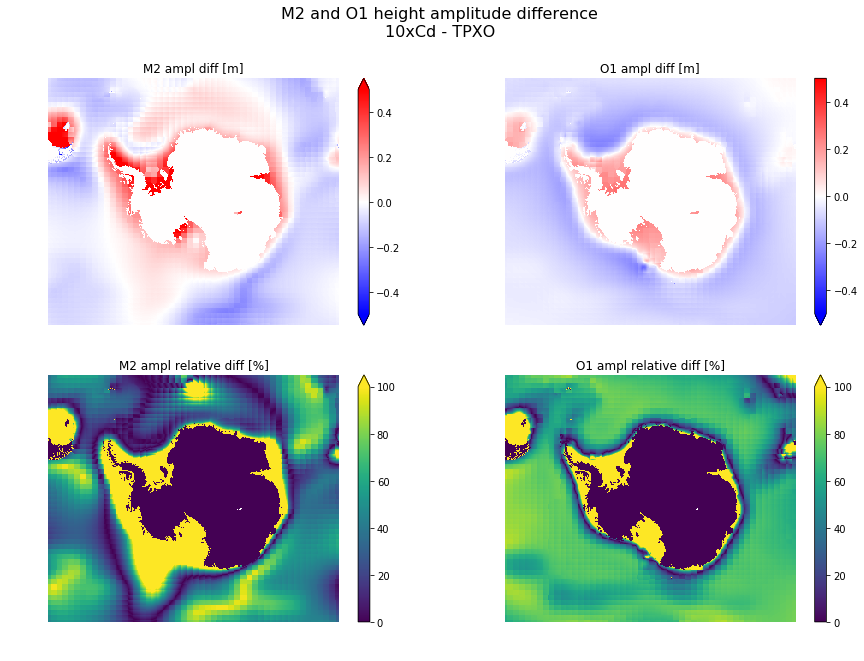

In [50]:
plot_M2O1_diff(ds_Cd,'10xCd',dsf,'TPXO',vmin=-0.50,vmax=0.50)

## Masking rosby radius of deformation
Since we assume that Kelvin waves are the source for the big discrepancies, I start masking multiples of the Rosby radius of deformation from the coastline (ice shelf front).

In [54]:
#mask tidal forcing
import xarray as xr
import os
import sys
import matplotlib.pyplot as plt
import numpy as np

from scipy import ndimage

pott_path = os.path.join(os.environ.get('rawdir'),'waom10_tidal_mask','Data','waom10','waom10_ptds_large.nc')
pott_ds = xr.open_dataset(pott_path)
grid_path =  os.path.join(os.environ.get('rawdir'),'waom10_tidal_mask','Data','waom10','waom10_grd_large.nc')
grid_ds = xr.open_dataset(grid_path)

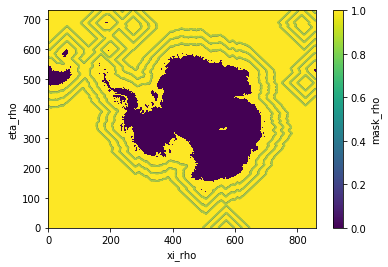

In [139]:
a = grid_ds.mask_rho.values.copy()
a[grid_ds.zice < 0.0] = 0
b = np.logical_not(ndimage.binary_dilation(np.logical_not(a),iterations=50).astype(a.dtype))
c = np.logical_not(ndimage.binary_dilation(np.logical_not(a),iterations=25).astype(a.dtype))
d = np.logical_not(ndimage.binary_dilation(np.logical_not(a),iterations=75).astype(a.dtype))

plt.close()
plt.contour(b,alpha=0.5)
plt.contour(c,alpha=0.5)
plt.contour(d,alpha=0.5)
grid_ds.mask_rho.plot()
plt.show()

In [60]:
out_path = os.path.join(pott_path,os.pardir,'waom10_ptds_rossby250.nc')
pott_ds['tide_Pamp']=pott_ds.tide_Pamp*c
pott_ds.to_netcdf(out_path,'w')

In [61]:
out_path = os.path.join(pott_path,os.pardir,'waom10_ptds_rossby500.nc')
pott_ds['tide_Pamp']=pott_ds.tide_Pamp*b
pott_ds.to_netcdf(out_path,'w')

In [141]:
out_path = os.path.join(pott_path,os.pardir,'waom10_ptds_rossby750.nc')
pott_ds['tide_Pamp']=pott_ds.tide_Pamp*d
pott_ds.to_netcdf(out_path,'w')

### Results

In [147]:
#look at results
file_path = os.path.join(os.environ.get('rawdir'),'waom10_tidal_mask','ocean_his_rossby500_0006.nc')
ds_rossby500 = xr.open_mfdataset(file_path,chunks={'xi_rho':100,'eta_rho':100}).isel(ocean_time=slice(50,-1))
file_path = os.path.join(os.environ.get('rawdir'),'waom10_tidal_mask','ocean_his_rossby250_0006.nc')
ds_rossby250 = xr.open_mfdataset(file_path,chunks={'xi_rho':100,'eta_rho':100}).isel(ocean_time=slice(50,-1))
file_path = os.path.join(os.environ.get('rawdir'),'waom10_tidal_mask','ocean_his_rossby750_0006.nc')
ds_rossby750 = xr.open_mfdataset(file_path,chunks={'xi_rho':100,'eta_rho':100}).isel(ocean_time=slice(50,-1))

In [148]:
rossby500_maxAmpl = ds_rossby500.zeta.max('ocean_time')-ds_rossby500.zeta.mean('ocean_time')
rossby250_maxAmpl = ds_rossby250.zeta.max('ocean_time')-ds_rossby250.zeta.mean('ocean_time')
rossby750_maxAmpl = ds_rossby750.zeta.max('ocean_time')-ds_rossby750.zeta.mean('ocean_time')

/home/ubuntu/bigStick/anaconda3/envs/tidal_melting/lib/python3.6/site-packages/dask/array/numpy_compat.py:46: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/home/ubuntu/bigStick/anaconda3/envs/tidal_melting/lib/python3.6/site-packages/dask/compatibility.py:47: RuntimeWarning: All-NaN slice encountered
  return func(*args, **kwargs)
/home/ubuntu/bigStick/anaconda3/envs/tidal_melting/lib/python3.6/site-packages/toolz/functoolz.py:468: RuntimeWarning: All-NaN slice encountered
  ret = f(ret)


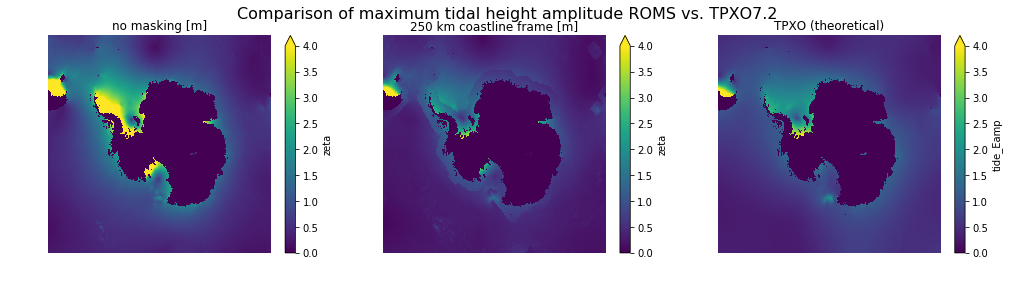

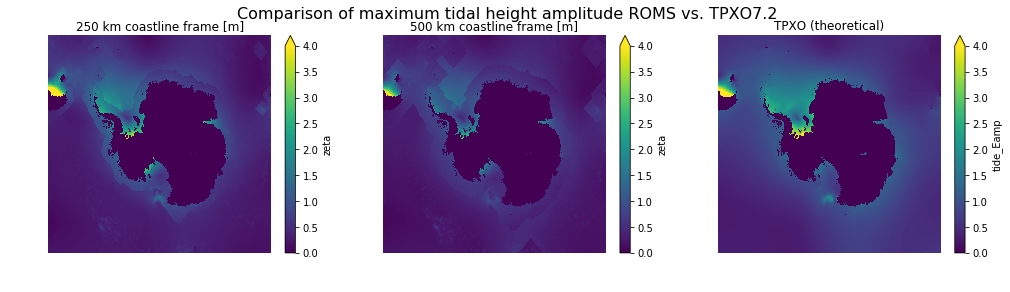

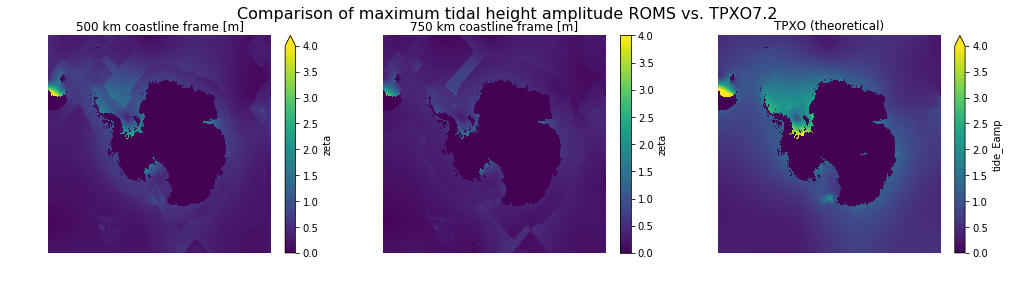

In [149]:
plot_max_ampl(rossby250_maxAmpl,'250 km coastline frame',ref_maxAmpl,'no masking')
plot_max_ampl(rossby500_maxAmpl,'500 km coastline frame',rossby250_maxAmpl,'250 km coastline frame')
plot_max_ampl(rossby750_maxAmpl,'750 km coastline frame',rossby500_maxAmpl,'500 km coastline frame')

In [150]:
ds_rossby500 = grid_ttide(ds_rossby500.zeta,ds_rossby500,res=50)
ds_rossby250 = grid_ttide(ds_rossby250.zeta,ds_rossby250,res=50)
ds_rossby750 = grid_ttide(ds_rossby750.zeta,ds_rossby250,res=50)

setting up the new fields  ['amp', 'amp_err', 'phase', 'phase_err']  for  ['O1', 'M2']
applying t_tide to every  50 th cell ...


VBox(children=(HTML(value=''), IntProgress(value=0, max=50)))

interpolating intermediate cells and mask land
setting up the new fields  ['amp', 'amp_err', 'phase', 'phase_err']  for  ['O1', 'M2']
applying t_tide to every  50 th cell ...


VBox(children=(HTML(value=''), IntProgress(value=0, max=50)))

interpolating intermediate cells and mask land
setting up the new fields  ['amp', 'amp_err', 'phase', 'phase_err']  for  ['O1', 'M2']
applying t_tide to every  50 th cell ...


VBox(children=(HTML(value=''), IntProgress(value=0, max=50)))

interpolating intermediate cells and mask land


/home/ubuntu/bigStick/anaconda3/envs/tidal_melting/lib/python3.6/site-packages/dask/local.py:271: RuntimeWarning: invalid value encountered in true_divide
  return func(*args2)
/home/ubuntu/bigStick/anaconda3/envs/tidal_melting/lib/python3.6/site-packages/dask/local.py:271: RuntimeWarning: divide by zero encountered in true_divide
  return func(*args2)


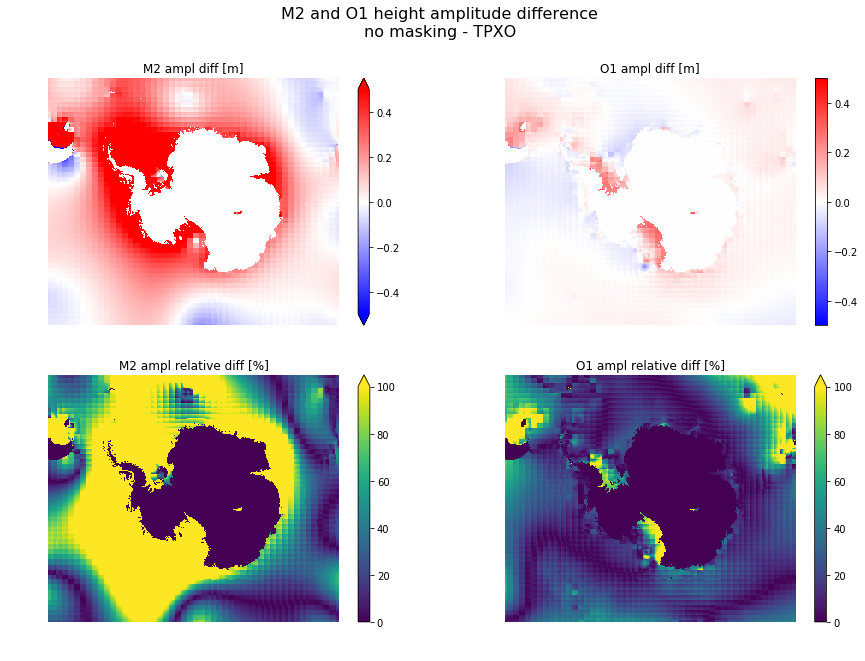

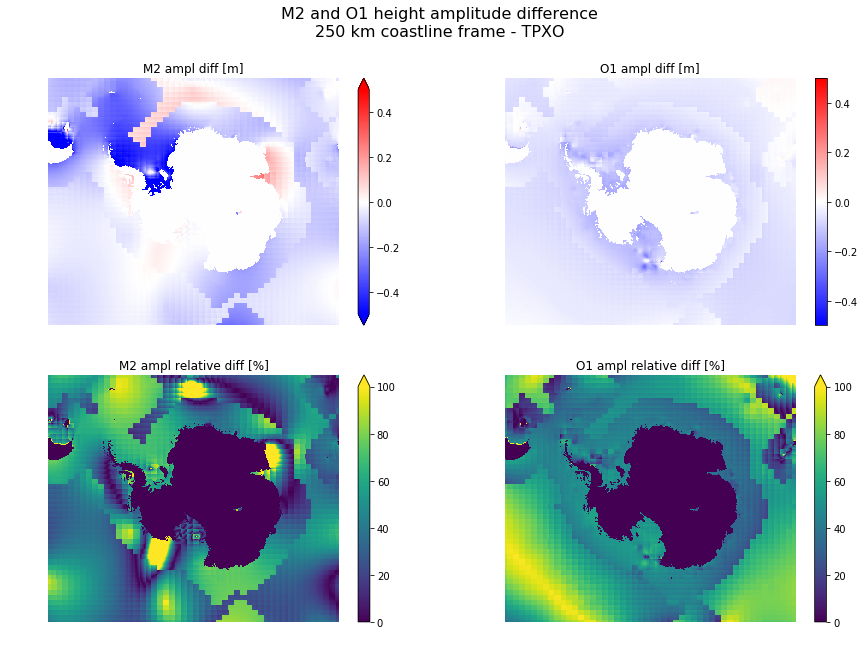

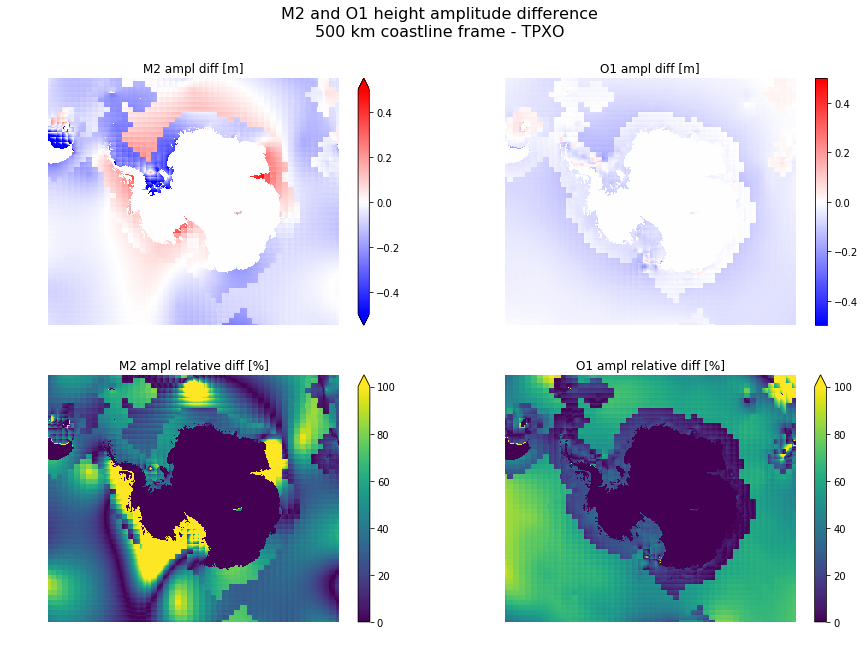

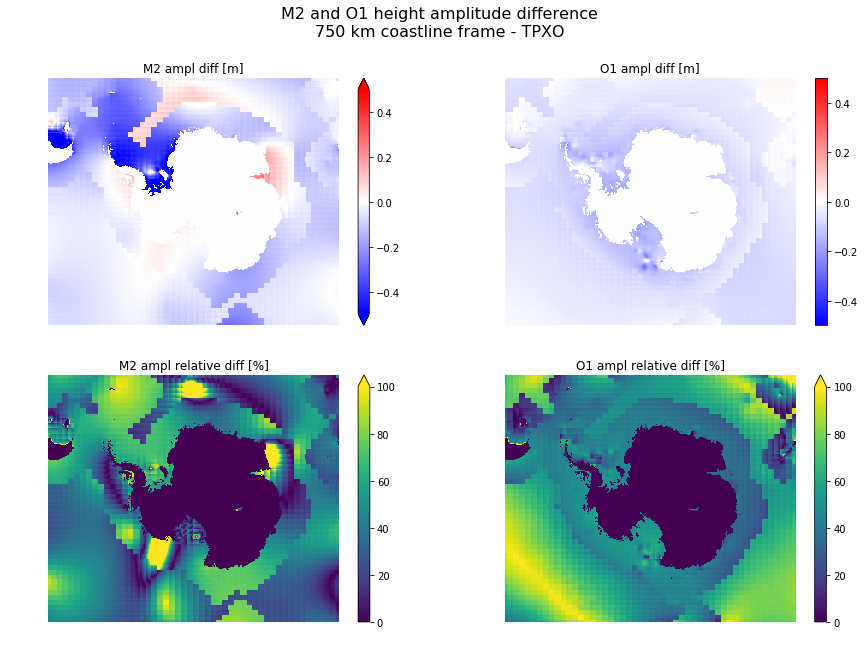

In [151]:
plot_M2O1_diff(ds_ref,'no masking',dsf,'TPXO',vmin=-0.50,vmax=0.50)
plot_M2O1_diff(ds_rossby250,'250 km coastline frame',dsf,'TPXO',vmin=-0.50,vmax=0.50)
plot_M2O1_diff(ds_rossby500,'500 km coastline frame',dsf,'TPXO',vmin=-0.50,vmax=0.50)
plot_M2O1_diff(ds_rossby750,'750 km coastline frame',dsf,'TPXO',vmin=-0.50,vmax=0.50)

## sea surface height and dynamic topography
If we think more in terms of energy (wct x amplitude), we may force with a wrong energy signal for our water column thickness grid, since tpxo may have no dynamic topography in their simulation. 

In [272]:
file_path = os.path.join(os.environ.get('rawdir'),'waom10_tides_ishelf','ocean_avg_hourly.nc')
bathtub_avg = xr.open_mfdataset(file_path)
file_path = os.path.join(os.environ.get('rawdir'),'waom10_full_forcing','ocean_avg_0005.nc')
ref_avg = xr.open_mfdataset(file_path,chunks={'eta_rho':100,'xi_rho':100}).isel(ocean_time=0)

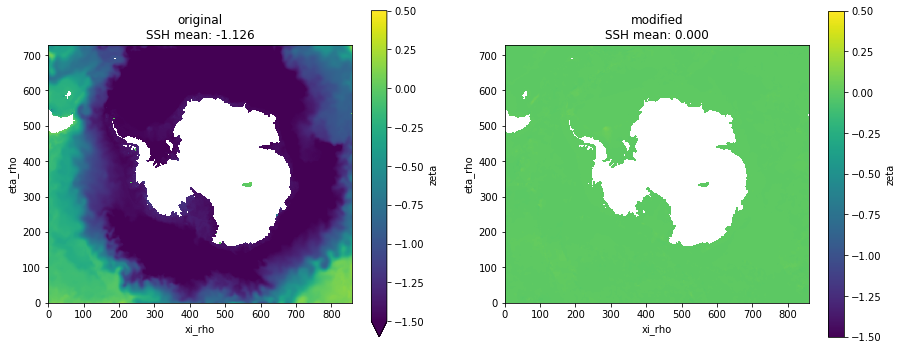

In [273]:
plt.close()
fig,(ax0,ax1) = plt.subplots(ncols=2,figsize=(15,6))
ref_avg.zeta.plot(ax=ax0,vmin=-1.5,vmax=0.5)
ax0.set_title('original\nSSH mean: %.3f'%ref_avg.zeta.mean().values)

bathtub_avg.zeta.plot(ax=ax1,vmin=-1.5,vmax=0.5)
ax1.set_title('modified\nSSH mean: %.3f'%bathtub_avg.zeta.mean().values)
for ax in [ax0,ax1]:
    ax.set_aspect('equal')
plt.show()

### Results

In [274]:
#look at results
file_path = os.path.join(os.environ.get('rawdir'),'waom10_tides','ocean_his_hourly.nc')
bathtub = []
bathtub = xr.open_mfdataset(file_path,chunks={'xi_rho':100,'eta_rho':100})
atg_path = os.path.join(os.environ.get('projdir'),'data','analysis','external','atg','ATG_ocean_height_2010_0908.mat')
mat_content = sio.loadmat(atg_path)
atg_data = mat_content['atg']

station_list = atg_data['site_id'][0,0].squeeze()

print('Model time strat and stop: ',bathtub.ocean_time[0].values,bathtub.ocean_time[-1].values,' || samples: ',bathtub.ocean_time.size)

Model time strat and stop:  2007-01-02T00:00:00.000000000 2007-02-10T08:00:00.000000000  || samples:  945


In [275]:
bathtub = grid_ttide(bathtub.zeta,bathtub,res=50)

setting up the new fields  ['amp', 'amp_err', 'phase', 'phase_err']  for  ['O1', 'M2']
applying t_tide to every  50 th cell ...


VBox(children=(HTML(value=''), IntProgress(value=0, max=50)))

interpolating intermediate cells and mask land


/home/ubuntu/bigStick/anaconda3/envs/tidal_melting/lib/python3.6/site-packages/dask/local.py:271: RuntimeWarning: invalid value encountered in true_divide
  return func(*args2)
/home/ubuntu/bigStick/anaconda3/envs/tidal_melting/lib/python3.6/site-packages/dask/local.py:271: RuntimeWarning: divide by zero encountered in true_divide
  return func(*args2)


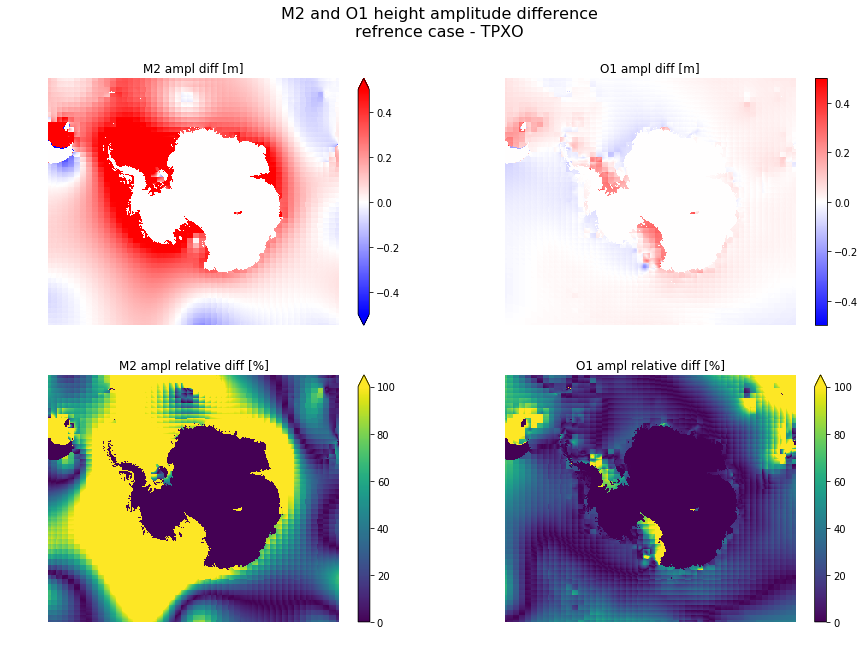

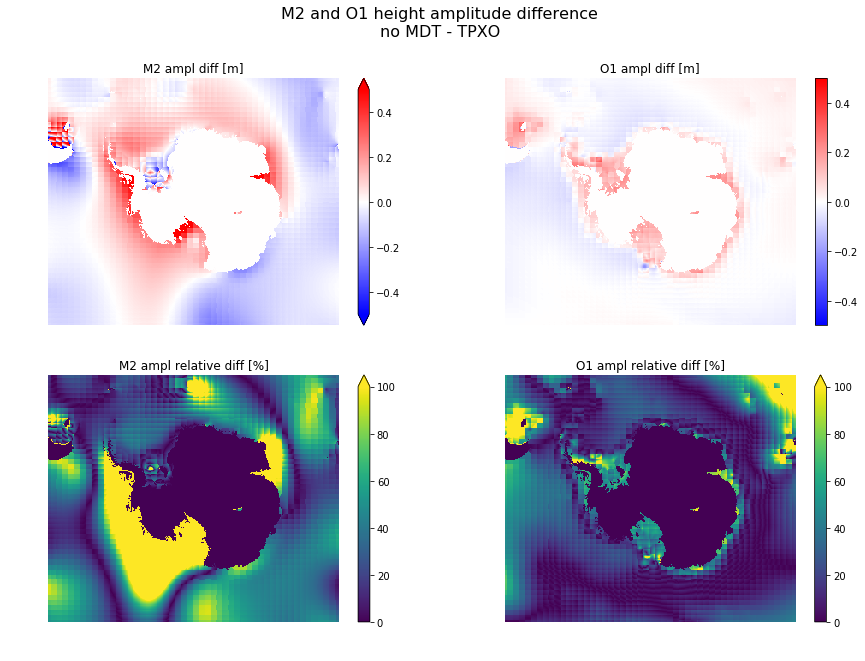

In [324]:
plot_M2O1_diff(ds_ref,'refrence case',dsf,'TPXO',vmin=-0.50,vmax=0.50)
plot_M2O1_diff(ishelf,'no MDT',dsf,'TPXO',vmin=-0.50,vmax=0.50)

In [306]:
import datetime

zeta=ishelf.zeta
mask=bathtub.mask_rho
stime = datetime.datetime(2007,1,2)
constit_list = ['M2','O1']
stations,RMSE = compare_tide(atg_path,zeta,mask,stime=stime,constit_list=constit_list,station_list=station_list)

stime =  2007-01-02 00:00:00  constits =  ['M2', 'O1'] stations =  [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108]


VBox(children=(HTML(value=''), IntProgress(value=0, max=108)))

Station ID || Amp(amp_err)[m]:  atg   roms || phase(phase_err)[deg]:  atg   roms || Station Name; RecLen [days]; Nearest Neibour [km]
M2
1 || 0.19  0.53(0.02)  || 287.87  48.33(2.83)  ||  faraday   365.0  0.85
2 || 0.34  0.50(0.02)  || 197.87  231.93(2.55)  ||  forster   307.25  0.83
3 || 0.12  0.54(0.03)  || 265.51  65.51(2.76)  ||  Rothera   365.0  1.29
4 || 0.45  0.55(0.03)  || 264.06  310.66(2.21)  ||  Signy   385.0  0.58
5 || 0.49  0.34(0.02)  || 280.00  358.58(3.26)  ||  PTC_4_2_01   4.2  0.18
6 || 0.53  0.55(0.03)  || 233.00  287.28(3.02)  ||  PTC_4_2_02   30.0  1.08
7 || 0.57  0.59(0.03)  || 242.00  284.87(2.64)  ||  PTC_4_2_03   180.0  0.48
8 || 0.41  0.46(0.02)  || 189.00  218.79(2.80)  ||  PTC_4_2_05 Georg Von Neumayer   324.0  0.37
9 || 0.46  0.50(0.03)  || 201.00  232.85(2.70)  ||  PTC_4_2_06 Kapp Norvegia   367.0  0.71
10 || 0.56  0.62(0.03)  || 220.00  253.52(2.73)  ||  PTC_4_2_07 Vestkapp   316.0  0.56
11 || 0.40  0.48(0.01)  || 274.00  336.74(2.13)  ||  PTC_4_2_12 Sign

71 || 0.35  0.41(0.00)  || 182.40  324.01(0.61)  ||  Ross Ice Shelf AFLT   68.0  0.31
72 || 0.36  0.39(0.01)  || 171.20  310.54(0.75)  ||  Ross Ice Shelf BFLT   74.0  1.11
73 || 0.38  0.40(0.01)  || 138.10  285.71(0.73)  ||  Ross Ice Shelf DFLT   74.0  0.93
74 || 0.36  0.40(0.01)  || 174.10  314.40(0.76)  ||  Siple W5C   43.0  1.13
75 || 0.38  0.38(0.01)  || 46.90  204.82(1.59)  ||  North Ronne   25.0  0.94
76 || 0.43  0.46(0.01)  || 53.50  207.60(1.80)  ||  Rutford GPS   56.0  0.83
77 || 0.21  0.22(0.00)  || 203.20  341.85(2.64)  ||  Cape Roberts Tide Gauge   365.0  0.79
78 || 0.23  0.25(0.01)  || 192.60  338.85(0.85)  ||  Scott Base Tide Gauge   365.0  1.03
79 || 0.18  0.20(0.01)  || 169.60  344.70(2.44)  ||  Terra Nova Bay Tide Gauge   119.0  1.69
80 || 0.35  0.44(0.01)  || 30.08  179.84(1.24)  ||  Foundation Ice Stream   30.0  1.16
81 || 0.32  0.40(0.01)  || 70.20  197.90(1.60)  ||  Doake Ice Rumples   43.0  0.22
82 || 0.26  0.31(0.01)  || 21.87  163.47(1.07)  ||  Ellsworth   34.0 

##  no MDT + no ice shelves

In [303]:
#look at results
file_path = os.path.join(os.environ.get('rawdir'),'waom10_tides_ishelf','ocean_his.nc')
ishelf = xr.open_mfdataset(file_path,chunks={'xi_rho':100,'eta_rho':100}) the ice shelf

In [304]:
ishelf = grid_ttide(ishelf.zeta,ishelf,res=50)

setting up the new fields  ['amp', 'amp_err', 'phase', 'phase_err']  for  ['O1', 'M2']
applying t_tide to every  50 th cell ...


VBox(children=(HTML(value=''), IntProgress(value=0, max=50)))

interpolating intermediate cells and mask land


/home/ubuntu/bigStick/anaconda3/envs/tidal_melting/lib/python3.6/site-packages/dask/local.py:271: RuntimeWarning: invalid value encountered in true_divide
  return func(*args2)
/home/ubuntu/bigStick/anaconda3/envs/tidal_melting/lib/python3.6/site-packages/dask/local.py:271: RuntimeWarning: divide by zero encountered in true_divide
  return func(*args2)


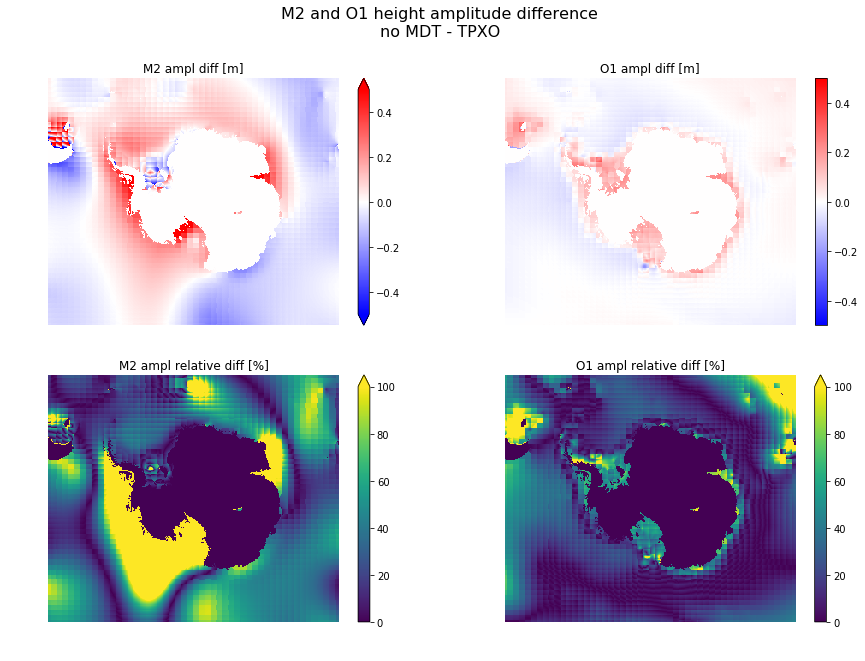

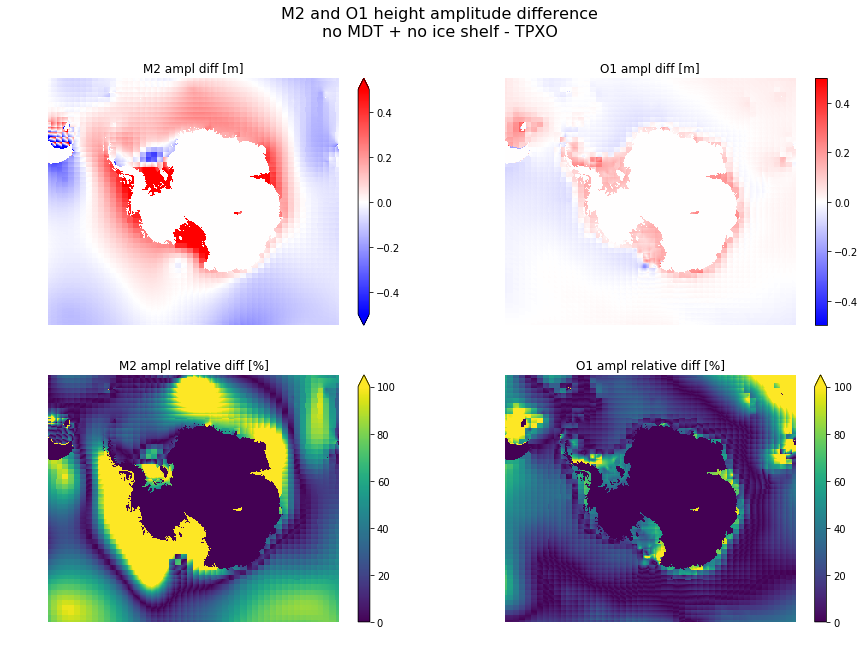

In [325]:
plot_M2O1_diff(ishelf,'no MDT',dsf,'TPXO',vmin=-0.50,vmax=0.50)
plot_M2O1_diff(bathtub,'no MDT + no ice shelf',dsf,'TPXO',vmin=-0.50,vmax=0.50)

In [277]:
import datetime

zeta=bathtub.zeta
mask=bathtub.mask_rho
stime = datetime.datetime(2007,1,2)
constit_list = ['M2','O1']
stations,RMSE = compare_tide(atg_path,zeta,mask,stime=stime,constit_list=constit_list,station_list=station_list)

stime =  2007-01-02 00:00:00  constits =  ['M2', 'O1'] stations =  [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108]
processing station  1
atg lat(lon): -65.25,-64.27
roms lat(lon): -65.23,-64.19
processing station  2
atg lat(lon): -70.77,-11.87
roms lat(lon): -70.81,-11.79
processing station  3
atg lat(lon): -67.57,-68.13
roms lat(lon): -67.65,-68.03
processing station  4
atg lat(lon): -60.70,-45.60
roms lat(lon): -60.75,-45.62
processing station  5
atg lat(lon): -77.12,-49.05
roms lat(lon): -77.13,-49.04
processing station  6
atg lat(lon): -74.43,-39.40
roms lat(lon): -74.47,-39.50
processing station  

atg lat(lon): -67.95,-62.67
roms lat(lon): -67.99,-62.69
processing station  98
atg lat(lon): -68.00,-62.69
roms lat(lon): -67.99,-62.69
processing station  99
atg lat(lon): -68.55,-65.15
roms lat(lon): -68.54,-65.17
processing station  100
atg lat(lon): -74.06,-112.42
roms lat(lon): -73.97,-112.47
processing station  101
atg lat(lon): -73.82,-117.00
roms lat(lon): -73.89,-117.00
processing station  102
atg lat(lon): -73.85,-115.57
roms lat(lon): -73.88,-115.55
processing station  103
atg lat(lon): -74.61,-103.87
roms lat(lon): -74.64,-103.79
processing station  104
atg lat(lon): -75.28,-101.13
roms lat(lon): -75.26,-101.10
processing station  105
atg lat(lon): -76.31,-77.58
roms lat(lon): -76.31,-77.64
processing station  106
atg lat(lon): -76.56,-76.20
roms lat(lon): -76.60,-76.15
processing station  107
atg lat(lon): -76.70,-76.69
roms lat(lon): -76.82,-76.74
processing station  108
atg lat(lon): -76.76,-75.42
roms lat(lon): -76.84,-75.48
Amp(amp_err)[m]:  atg      roms    ||   phas

## no MDT + rossby mask

In [299]:
from scipy import ndimage

pott_path = os.path.join(os.environ.get('rawdir'),'waom10_tidal_mask','Data','waom10','waom10_ptds_large.nc')
pott_ds = xr.open_dataset(pott_path)
grid_path =  os.path.join(os.environ.get('rawdir'),'waom10_tidal_mask','Data','waom10','waom10_grd_large.nc')
grid_ds = xr.open_dataset(grid_path)

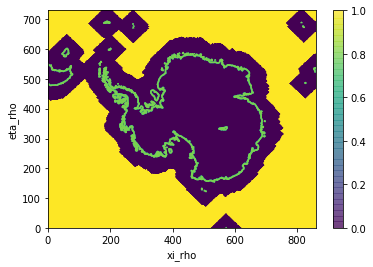

In [300]:
a = grid_ds.mask_rho.values.copy()
a[grid_ds.zice < 0.0] = 0
b = np.logical_not(ndimage.binary_dilation(np.logical_not(a),iterations=25).astype(a.dtype))

plt.close()
plt.pcolormesh(b,alpha=0.5)
plt.colorbar()
grid_ds.mask_rho.plot.contour()
plt.show()

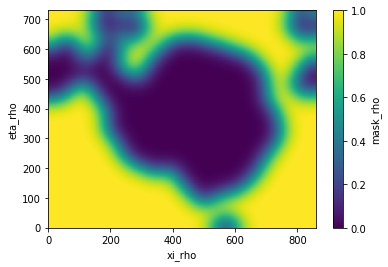

In [301]:
from scipy.ndimage.filters import gaussian_filter, uniform_filter
mask_tmp = grid_ds.mask_rho.copy()
mask_tmp[:] = b
mask_tmp.values = gaussian_filter(mask_tmp,30)

plt.close()
mask_tmp.plot()
plt.show()

In [302]:
out_path = os.path.join(os.environ.get('rawdir'),'waom10_tides_rossby','waom10_rossby250smooth.nc')
pott_ds['tide_Pamp']=pott_ds.tide_Pamp*mask_tmp
pott_ds.to_netcdf(out_path,'w')

In [335]:
#look at results
file_path = os.path.join(os.environ.get('rawdir'),'waom10_tides_rossby','ocean_his_r2.nc')
r2 = xr.open_mfdataset(file_path,chunks={'xi_rho':100,'eta_rho':100}).isel(ocean_time=slice(0,721))

In [313]:
r2 = grid_ttide(r2.zeta,r2,res=50)

setting up the new fields  ['amp', 'amp_err', 'phase', 'phase_err']  for  ['O1', 'M2']
applying t_tide to every  50 th cell ...


VBox(children=(HTML(value=''), IntProgress(value=0, max=50)))

interpolating intermediate cells and mask land


/home/ubuntu/bigStick/anaconda3/envs/tidal_melting/lib/python3.6/site-packages/dask/local.py:271: RuntimeWarning: invalid value encountered in true_divide
  return func(*args2)
/home/ubuntu/bigStick/anaconda3/envs/tidal_melting/lib/python3.6/site-packages/dask/local.py:271: RuntimeWarning: divide by zero encountered in true_divide
  return func(*args2)


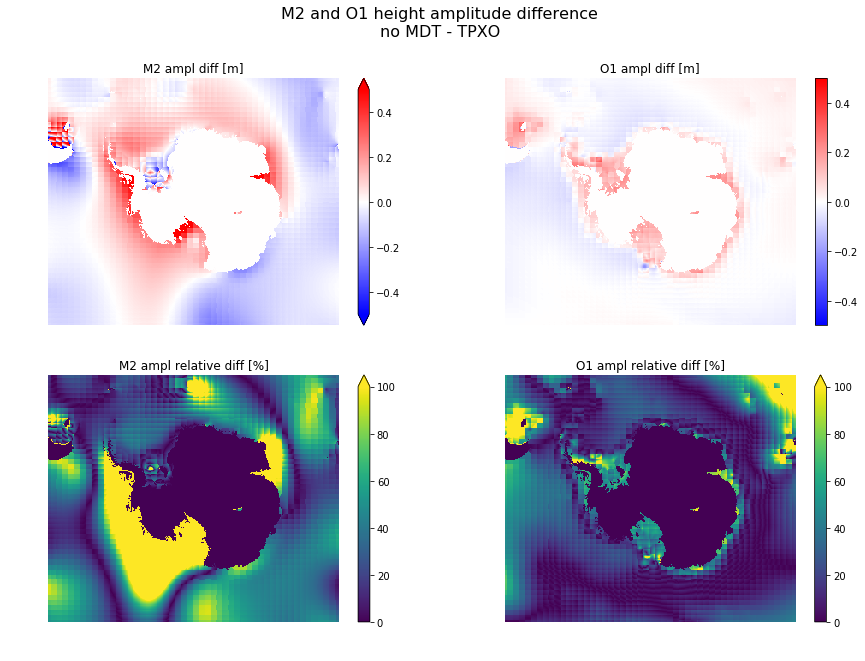

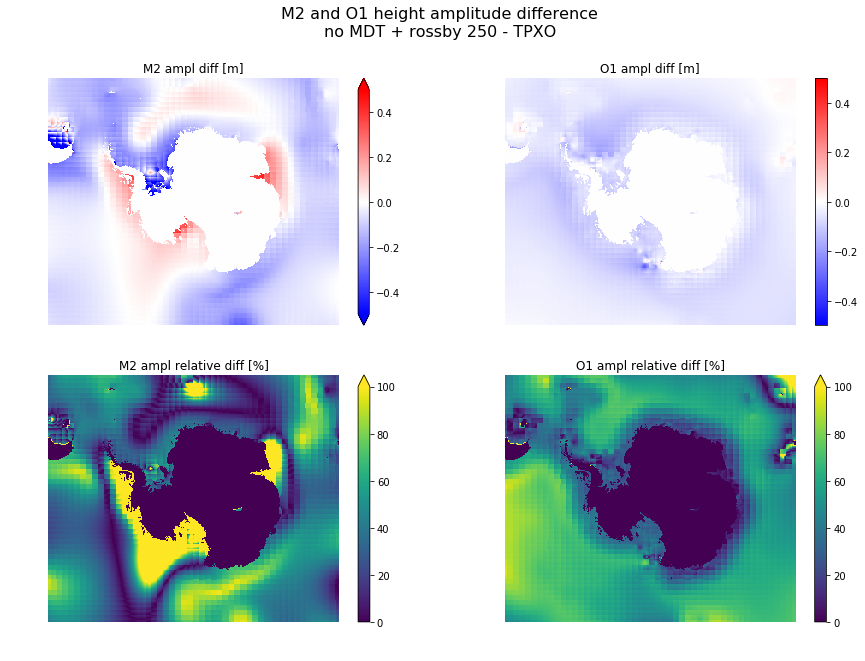

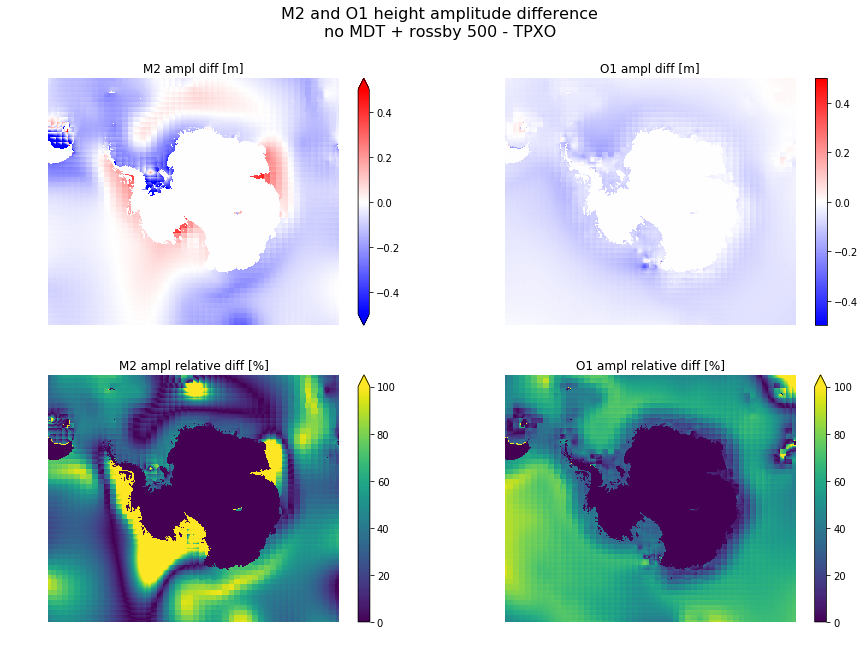

In [326]:
plot_M2O1_diff(ishelf,'no MDT',dsf,'TPXO',vmin=-0.50,vmax=0.50)
plot_M2O1_diff(r2,'no MDT + rossby 250',dsf,'TPXO',vmin=-0.50,vmax=0.50)

In [315]:
stations,RMSE = compare_tide(atg_path,r2.zeta,mask,stime=stime,constit_list=constit_list,station_list=station_list)

stime =  2007-01-02 00:00:00  constits =  ['M2', 'O1'] stations =  [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108]


VBox(children=(HTML(value=''), IntProgress(value=0, max=108)))

Station ID || Amp(amp_err)[m]:  atg   roms || phase(phase_err)[deg]:  atg   roms || Station Name; RecLen [days]; Nearest Neibour [km]
M2
1 || 0.19  0.47(0.02)  || 287.87  110.81(2.01)  ||  faraday   365.0  0.85
2 || 0.34  0.40(0.01)  || 197.87  293.81(2.04)  ||  forster   307.25  0.83
3 || 0.12  0.46(0.02)  || 265.51  128.87(2.37)  ||  Rothera   365.0  1.29
4 || 0.45  0.47(0.01)  || 264.06  7.86(1.83)  ||  Signy   385.0  0.58
5 || 0.49  0.34(0.01)  || 280.00  40.53(2.28)  ||  PTC_4_2_01   4.2  0.18
6 || 0.53  0.59(0.02)  || 233.00  335.20(1.95)  ||  PTC_4_2_02   30.0  1.08
7 || 0.57  0.60(0.02)  || 242.00  334.69(1.95)  ||  PTC_4_2_03   180.0  0.48
8 || 0.41  0.37(0.01)  || 189.00  280.81(1.96)  ||  PTC_4_2_05 Georg Von Neumayer   324.0  0.37
9 || 0.46  0.40(0.01)  || 201.00  294.67(2.07)  ||  PTC_4_2_06 Kapp Norvegia   367.0  0.71
10 || 0.56  0.50(0.02)  || 220.00  314.94(2.22)  ||  PTC_4_2_07 Vestkapp   316.0  0.56
11 || 0.40  0.41(0.01)  || 274.00  32.42(1.52)  ||  PTC_4_2_12 Signy 

68 || 0.30  0.23(0.00)  || 274.30  133.55(0.53)  ||  Amery Ice Shelf TS03   57.0  0.65
69 || 0.31  0.25(0.00)  || 272.00  130.83(0.46)  ||  Amery Ice Shelf TS04   65.0  1.03
70 || 0.09  0.29(0.01)  || 286.60  137.46(1.03)  ||  Amery Ice Shelf TS05 (partially grounded)   67.0  1.29
71 || 0.35  0.26(0.01)  || 182.40  23.78(1.28)  ||  Ross Ice Shelf AFLT   68.0  0.31
72 || 0.36  0.24(0.01)  || 171.20  10.17(1.67)  ||  Ross Ice Shelf BFLT   74.0  1.11
73 || 0.38  0.24(0.01)  || 138.10  345.29(2.06)  ||  Ross Ice Shelf DFLT   74.0  0.93
74 || 0.36  0.25(0.01)  || 174.10  14.03(1.48)  ||  Siple W5C   43.0  1.13
75 || 0.38  0.21(0.01)  || 46.90  266.44(2.47)  ||  North Ronne   25.0  0.94
76 || 0.43  0.29(0.01)  || 53.50  270.76(0.96)  ||  Rutford GPS   56.0  0.83
77 || 0.21  0.14(0.01)  || 203.20  41.69(2.45)  ||  Cape Roberts Tide Gauge   365.0  0.79
78 || 0.23  0.15(0.01)  || 192.60  38.44(2.19)  ||  Scott Base Tide Gauge   365.0  1.03
79 || 0.18  0.13(0.01)  || 169.60  44.13(3.02)  ||  Ter